importing packages

In [1]:
import pandas as pd,numpy as np, os
import matplotlib.pyplot as plt

reading dataframe from csv

In [2]:
#os.chdir("~/Documents/MFE_PREPROGRAMS/python/Homeworks/UCB-MFE-python-preprogram/Lectures/Lecture 3/data")
data = pd.read_csv("../../../Lectures/Lecture 3/data/hw3.csv")
data.head(10)

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
5,2021-12-08 12:00:00,3.8405,3.8789,3.7900,3.8392,3.788895e+05,NaN,CRV,ETH
6,2021-12-04 07:00:00,188.6880,196.4860,185.2630,190.8720,1.041406e+04,NaN,AAVE,ETH
7,2021-12-05 02:00:00,1.0015,1.0016,1.0012,1.0013,3.398077e+06,NaN,USDT,USDT
8,2021-12-09 10:00:00,1.0009,1.0010,1.0008,1.0009,7.236563e+06,NaN,USDT,USDT
9,2021-12-03 23:00:00,20.0490,20.1703,19.9061,19.9120,3.884822e+04,NaN,UNI,ETH


since dataset is notsorted by date and time, sorting data for better visualisation

In [3]:
data.sort_values('ts', inplace=True)
data= data.reset_index(drop=True)
data.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,210.3120,NaN,208.4320,208.6760,70031.618000,NaN,SOL,SOL
1,2021-12-01 00:00:00,280.5900,281.4000,278.3000,278.7000,207.849000,NaN,COMP,ETH
2,2021-12-01 00:00:00,257.1020,260.7750,255.3450,257.0780,2730.299000,NaN,AAVE,ETH
3,2021-12-01 00:00:00,21.2004,21.3115,21.0337,21.2659,12406.133674,NaN,UNI,ETH
4,2021-12-01 00:00:00,57321.4100,57451.0500,56814.3400,56987.9700,388.482022,NaN,BTC,BTC


basic information of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


we could see above that out of 2667 rows, there are missing (NULL) values of high, low, close and volumneUSD columns

In [5]:
#finding unique values of token
data.token.unique()

array(['SOL', 'COMP', 'AAVE', 'UNI', 'BTC', 'ETH', 'USDT', 'CRV',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">COMP</span>'], dtype=object)

as few tokens are in html format, token names have to be extracted as below

In [6]:
data.loc[data.token.str.contains('span'), 'token'] = data.loc[data.token.str.contains('span'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').values
data.token.value_counts()

UNI     342
BTC     337
CRV     335
SOL     334
USDT    333
COMP    332
AAVE    328
ETH     326
Name: token, dtype: int64

dropping duplicates

In [7]:
data.drop_duplicates(subset=['ts','chain','token'], inplace=True)
len(data.index)

2360

we could see above that total rows decreased from 2667 to 2360. Hence, duplicates were present.

plotting prices of each token

In [8]:
def plotting(df,cols,nrows,ncols,groupbyColumn=None):
    for t in list(df[groupbyColumn].unique()):
        temp = df[df[groupbyColumn]==t].set_index("ts")
        temp = temp.sort_index()
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=(10, 10))
        fig.suptitle(t)
        i = 0
        for param in cols:
            temp[param].plot(ax=axes[i//2, i%2], label=param, rot=30)
            axes[i//2, i%2].legend()
            axes[i//2, i%2].set_title(param)
            i = i+1
        fig.tight_layout()
    

plotting raw data for visualising data quality

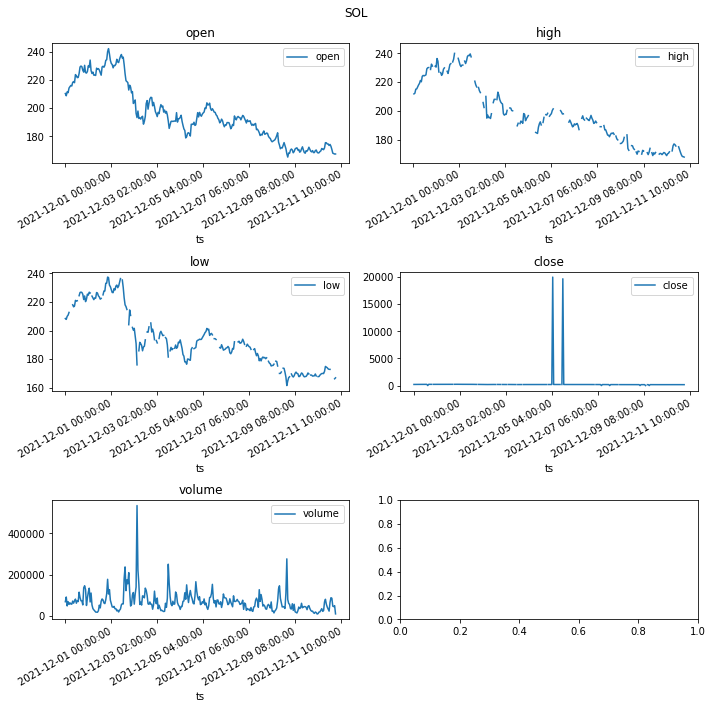

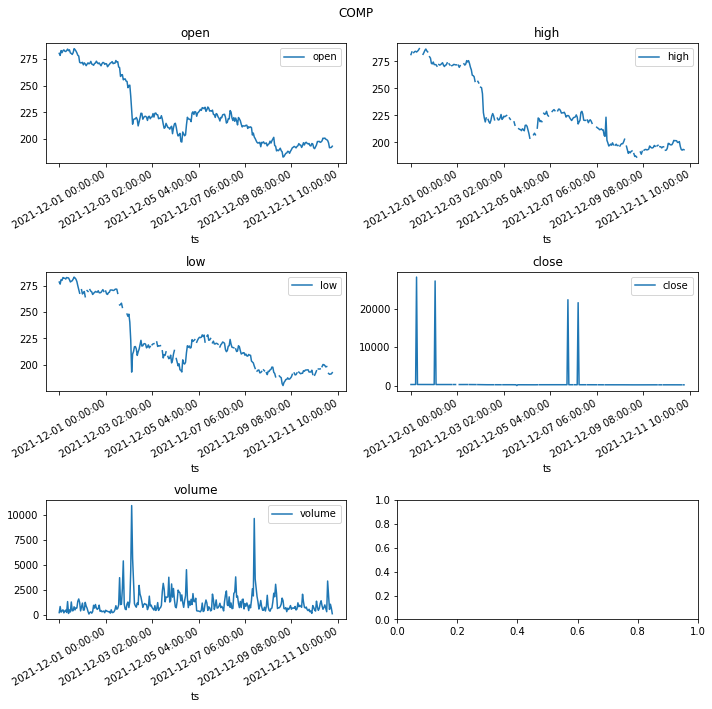

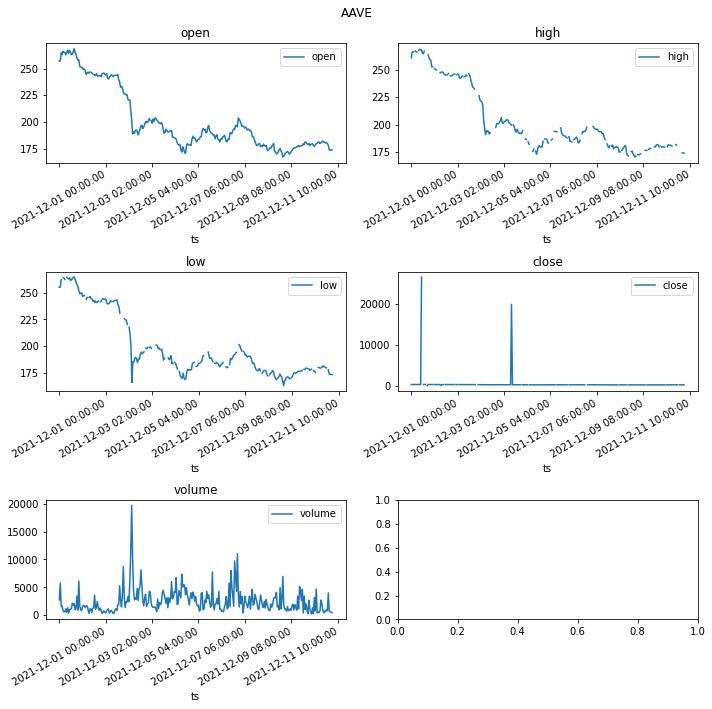

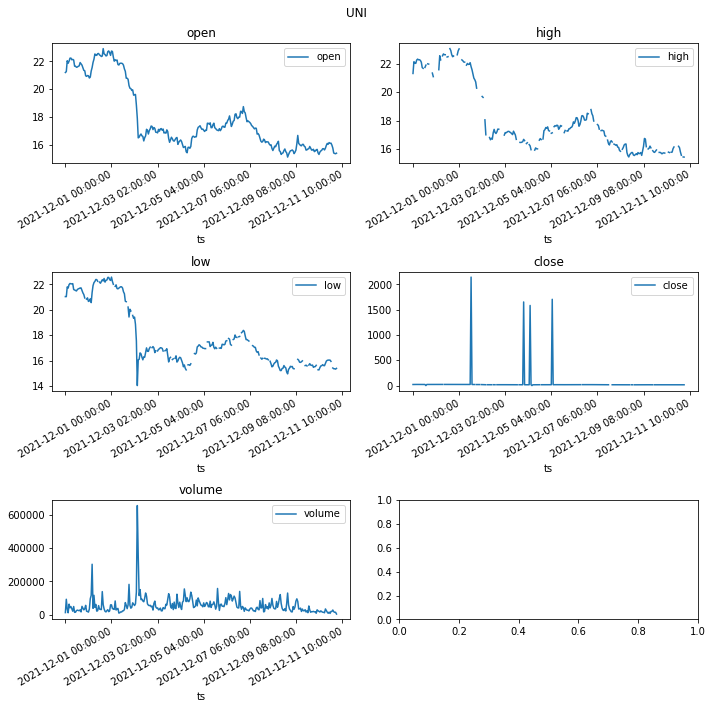

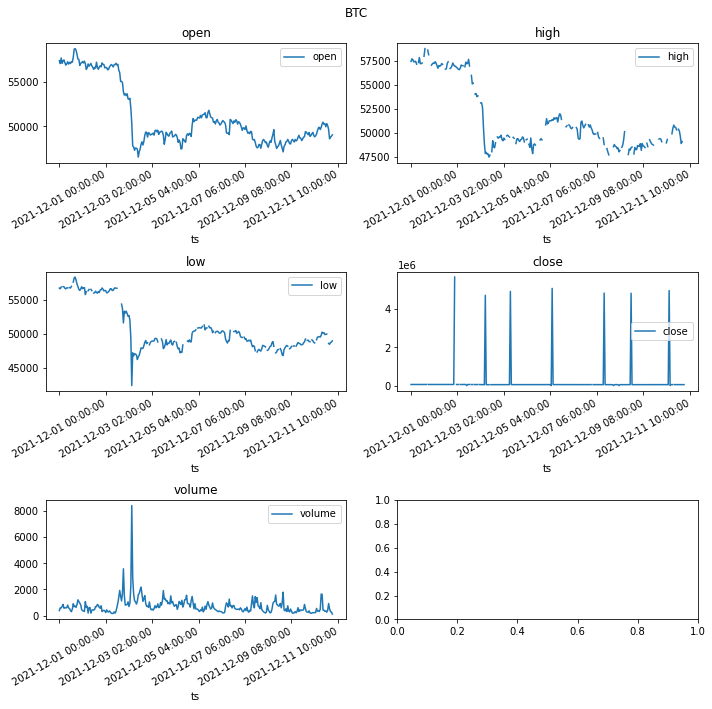

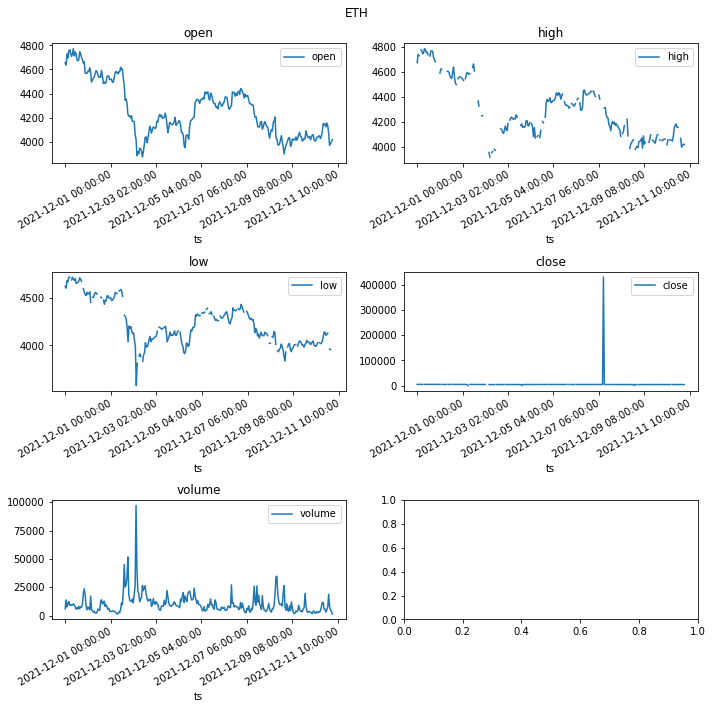

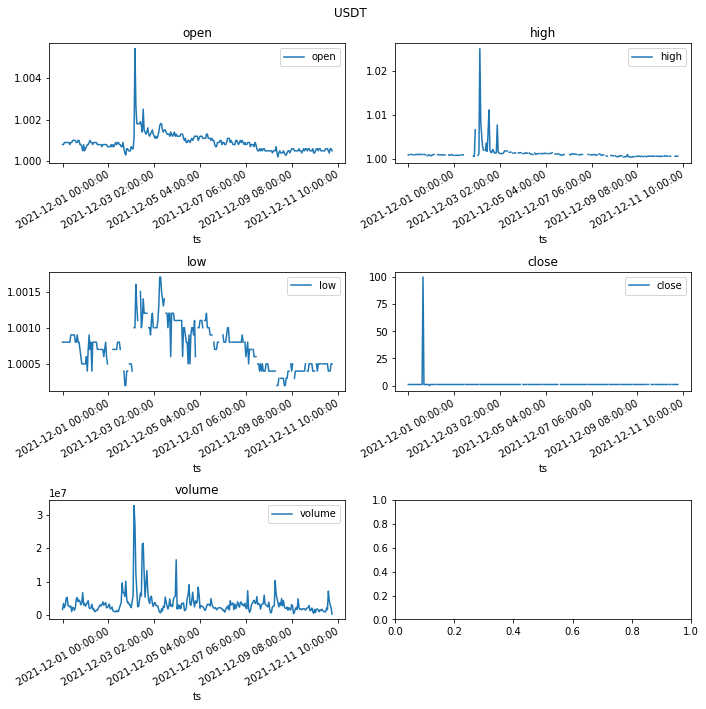

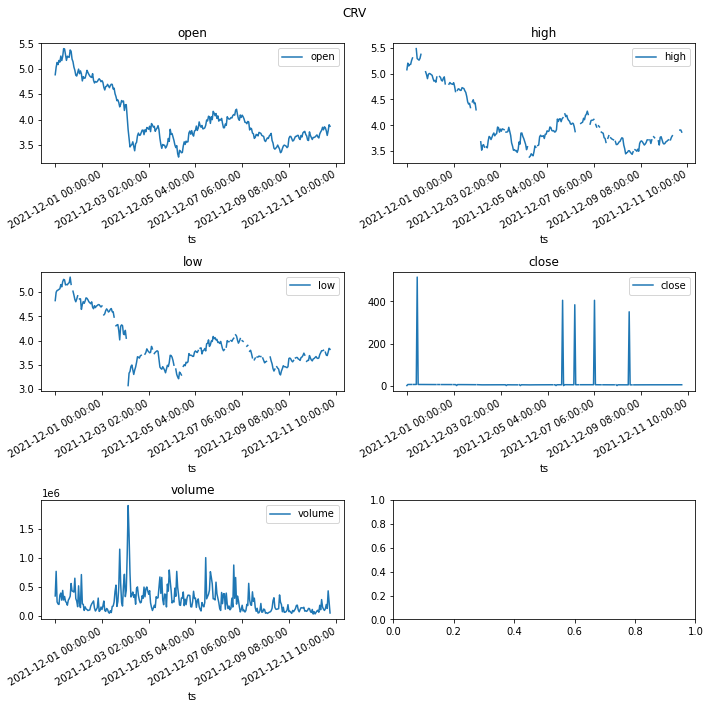

In [9]:
 plotting(data,["open","high","low","close","volume"],3,2,groupbyColumn="token")

Through above plots we could see volume and open price data is fine for all the tokens. There are outliers in close price data series of all the tokens. Also, low, high and close price series have missing values. Missing values of the prices will be filled by padding the previous known prices. Outliers in close price will be removed and replaced by mean value of open, high and low prices.

In [10]:
data.set_index("ts",inplace=True)
data["closeReturnsAbsolute"] = abs(data.groupby("token")['close'].pct_change().values) * 100
data.reset_index(inplace=True)
data.tail(5)

,ts,open,high,low,close,volume,volumeUSD,token,chain,closeReturnsAbsolute
2355,2021-12-13 06:00:00,167.48,167.80,166.93,167.64,11191.365000,NaN,SOL,SOL,0.089558
2356,2021-12-13 06:00:00,49065.45,49108.33,48970.10,49087.76,123.274547,NaN,BTC,BTC,0.045531
2357,2021-12-13 06:00:00,3.87,3.87,3.82,NaN,45270.080000,NaN,CRV,ETH,0.000000
2358,2021-12-13 06:00:00,4020.10,4021.99,NaN,4014.90,1344.134433,NaN,ETH,ETH,0.129350
2359,2021-12-13 06:00:00,173.83,174.13,NaN,173.99,415.171000,NaN,AAVE,ETH,0.103561


Finding outliers by comparing 50th, 90th, 99th and 99.99th percentile of "closeReturnsAbsolute"

In [11]:
percentileDf = data[["closeReturnsAbsolute","token"]].groupby("token").quantile([0.5,0.95,0.99,0.9999])
percentileDf

closeReturnsAbsolute
token                             
AAVE  0.5000              0.626576
      0.9500              3.342678
      0.9900           9782.116733
      0.9999           9901.247673
BTC   0.5000              0.430662
      0.9500             99.001346
      0.9900           9958.775233
      0.9999         966127.473364
COMP  0.5000              0.653259
      0.9500              4.006052
      0.9900           9879.187469
      0.9999           9979.087186
CRV   0.5000              1.126452
      0.9500             99.012167
      0.9900          10105.119676
      0.9999          10550.998931
ETH   0.5000              0.452336
      0.9500              2.643016
      0.9900           9756.667236
      0.9999           9920.935716
SOL   0.5000              0.739935
      0.9500             98.982963
      0.9900           9945.735788
      0.9999          10044.650886
UNI   0.5000              0.619302
      0.9500              3.923300
      0.9900           9793.524882
      0.9999          10010.510624
USDT  0.5000              0.009989
      0.9500              0.029968
      0.9900             99.000021
      0.9999           9900.000000

removing outliers and replacing with NULL

In [12]:
data['close'].values[data.closeReturnsAbsolute>20.0] = np.nan
data.set_index("ts",inplace=True)

#removing 1st "ts" of "CRV" token as 1st close price is erroneous
data.drop(index=data[data.token=="CRV"].index[0],axis=0,inplace=True)

data["closeReturnsAbsolute1"] = abs(data.groupby("token")['close'].pct_change().values) * 100
data.reset_index(inplace=True)

Filling missing values of the prices by padding the prices

In [13]:
data = data.groupby("token").apply(lambda x: x.set_index("ts").ffill().reset_index())
data.reset_index(level=0,drop=True,inplace=True)

In [14]:
data.head(10)

,ts,open,high,low,close,volume,volumeUSD,token,chain,closeReturnsAbsolute,closeReturnsAbsolute1
0,2021-12-01 01:00:00,257.149,266.249,255.270,264.816,5752.541,NaN,AAVE,ETH,3.009981,NaN
1,2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.330,NaN,AAVE,ETH,0.638557,0.638557
2,2021-12-01 03:00:00,263.184,266.187,262.597,266.257,1647.398,NaN,AAVE,ETH,1.190309,1.190309
3,2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,NaN,AAVE,ETH,0.283561,0.283561
4,2021-12-01 05:00:00,265.491,266.088,264.000,265.073,594.071,NaN,AAVE,ETH,0.161581,0.161581
5,2021-12-01 06:00:00,265.179,266.107,262.566,262.621,616.346,NaN,AAVE,ETH,0.925028,0.925028
6,2021-12-01 07:00:00,262.816,266.107,262.566,265.498,1150.309,NaN,AAVE,ETH,1.095495,1.095495
7,2021-12-01 08:00:00,265.367,267.494,264.519,267.070,527.563,NaN,AAVE,ETH,0.592095,0.592095
8,2021-12-01 09:00:00,267.423,268.591,263.822,264.409,1325.214,NaN,AAVE,ETH,0.996368,0.996368
9,2021-12-01 10:00:00,264.425,267.732,262.967,267.344,360.597,NaN,AAVE,ETH,1.110023,1.110023


calculating volumeUSD

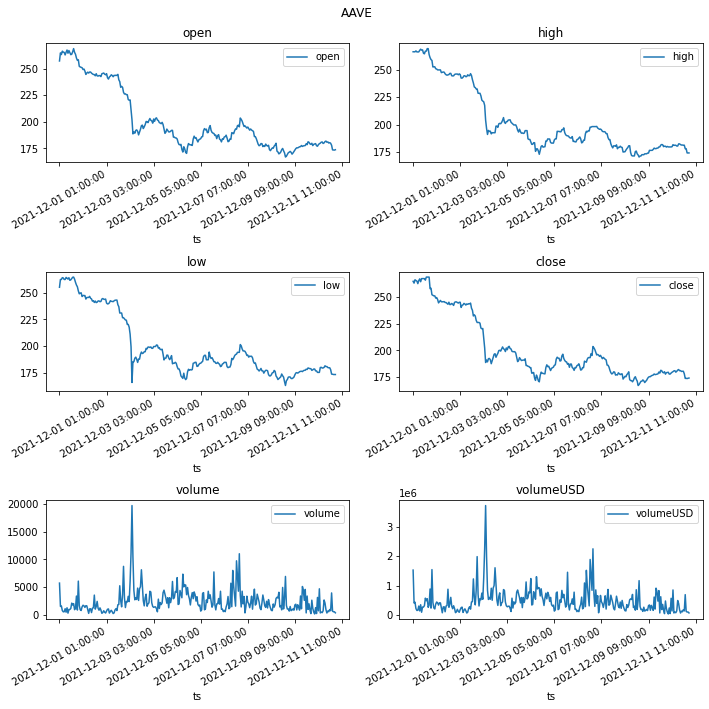

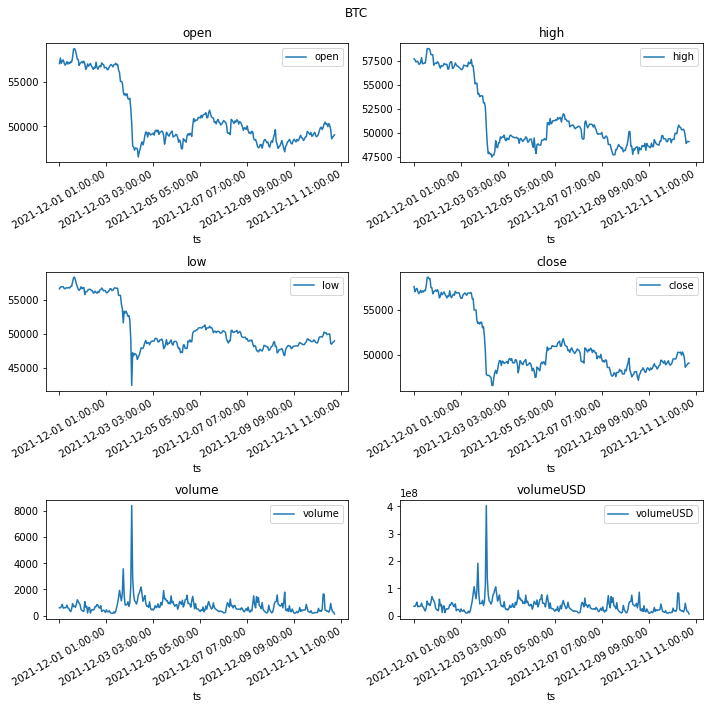

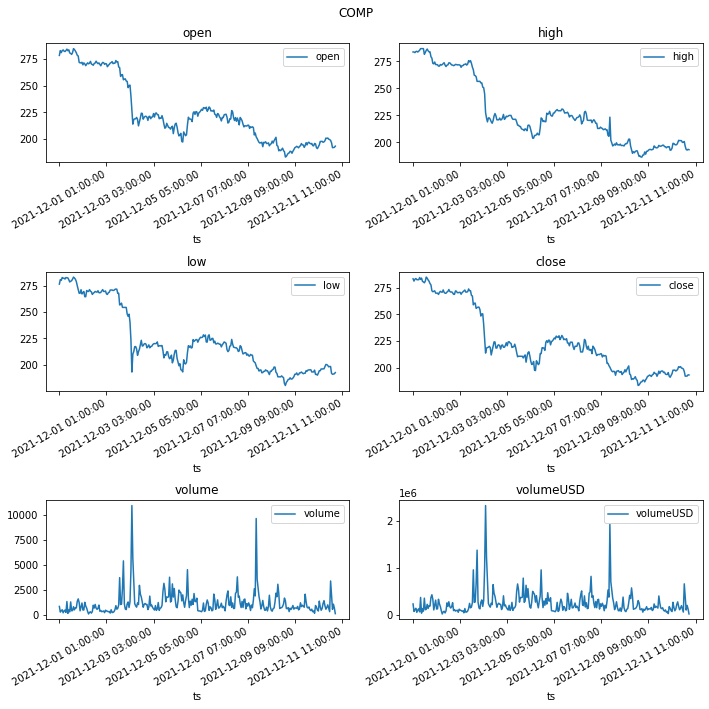

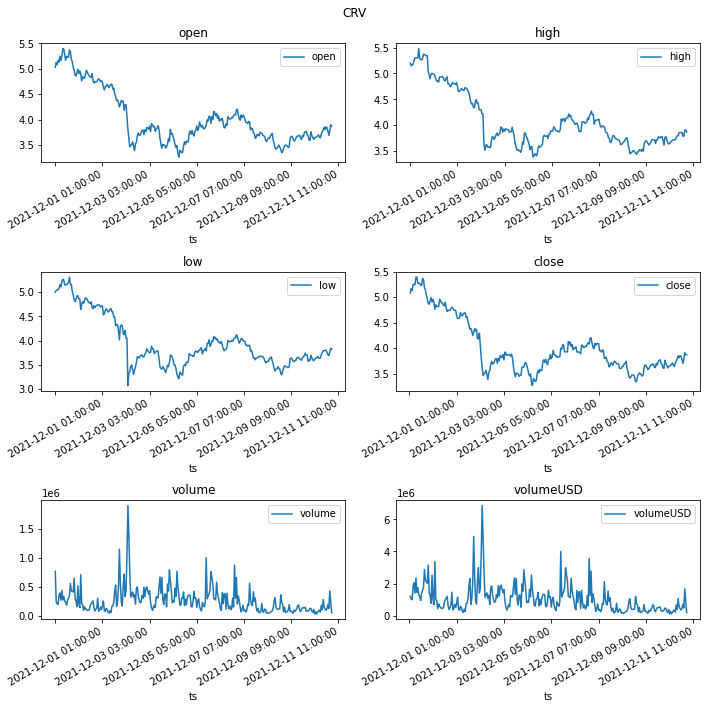

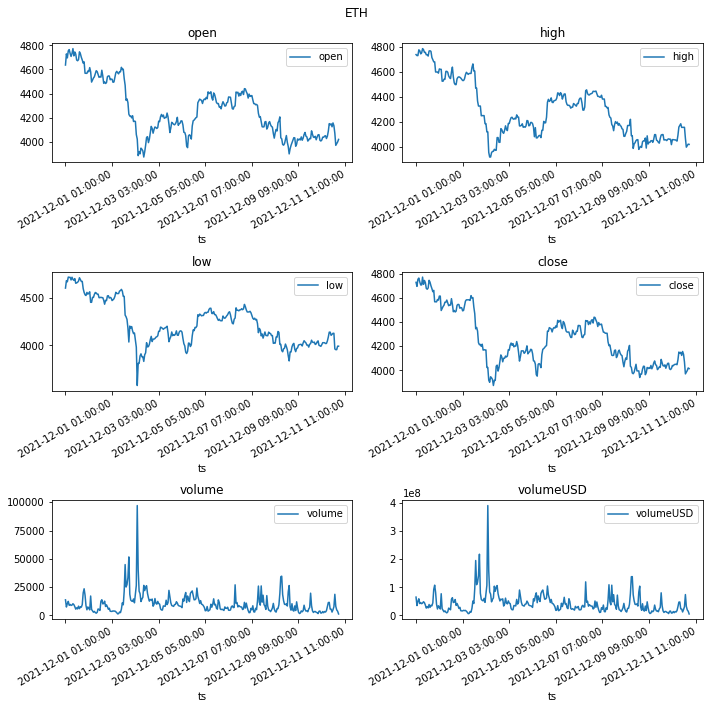

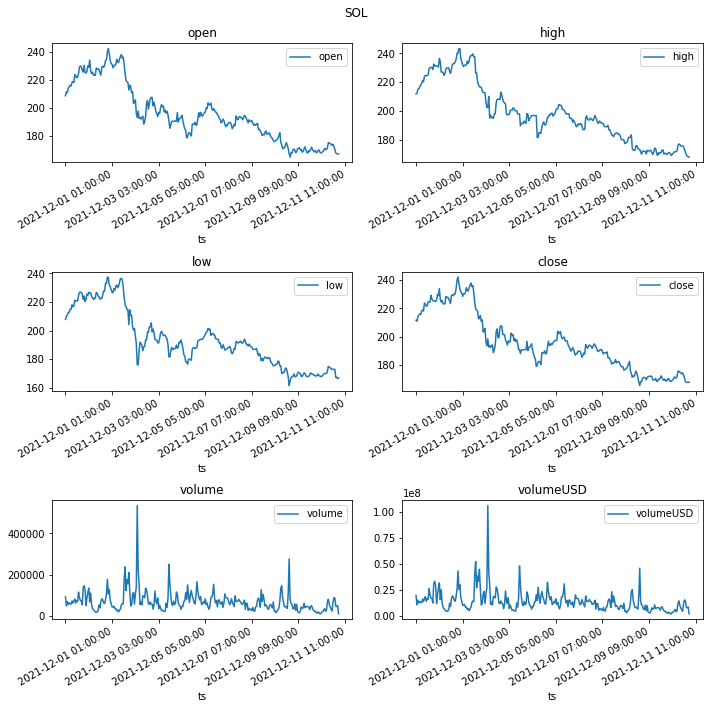

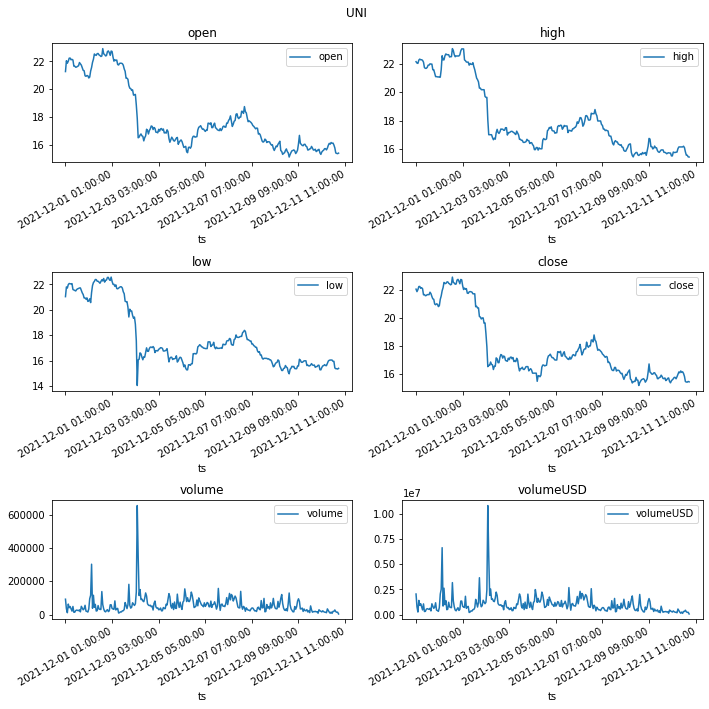

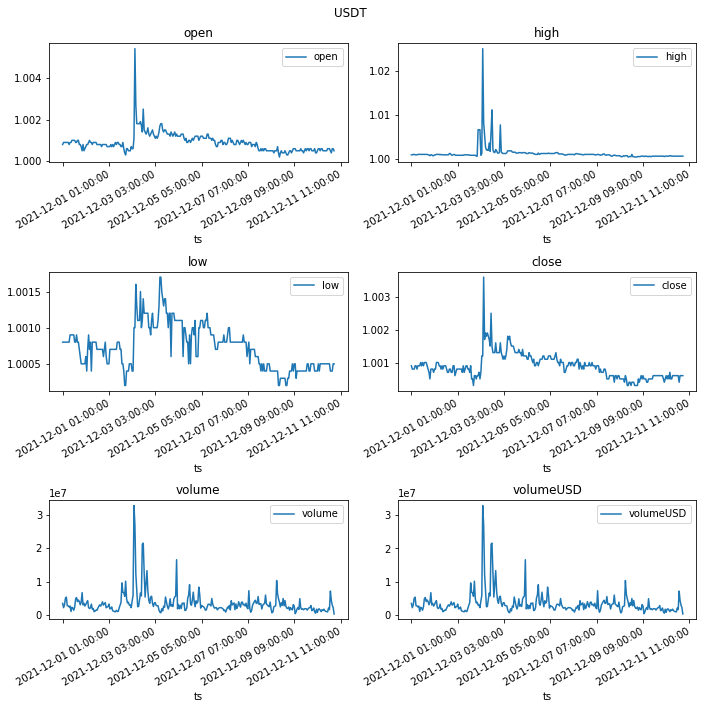

In [15]:
data["volumeUSD"] = data["volume"] * data["close"]
#plotting after cleaning data and calculating volumeUSD
plotting(data,["open","high","low","close","volume","volumeUSD"],3,2,groupbyColumn="token")

calculating volume USD by chain

In [16]:
volumeUSDChain = data.groupby('chain')[['volumeUSD']].sum()
volumeUSDChain.sort_values('volumeUSD', ascending=False, inplace=True)
volumeUSDChain

,volumeUSD
chain,
ETH,1.363751e+10
BTC,1.093707e+10
SOL,4.061464e+09
USDT,1.006272e+09


plotting volumeUSD by chain for visualisation

<AxesSubplot:title={'center':'VolumeUSD by Chain'}, xlabel='chain'>

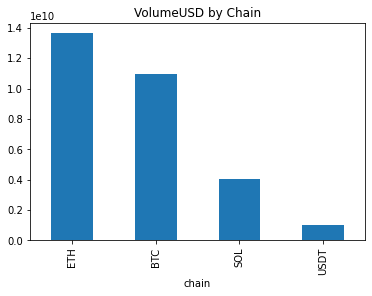

In [17]:
volumeUSDChain.plot(kind='bar', title='VolumeUSD by Chain',legend=False)